<header><h1><font color='blue' >Day 2 Worksheet: Sentiment Classification</font></h1></header>
<br>
<font size='4pt'>Group 3</font>
<li>Fu Hai Dong (A0056238A) </li>
<li>Gao Yuan (A0178404A)</li>
<li>Hu Meng Xi (A0178561W )</li>
<li>Liu Xinlu (A0163197X)</li>
<li>Shi Jing Li (A0163341N)</li>
<li>Tan Wei Ying (A0058544Y)</li>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re, nltk
from nltk.corpus import stopwords

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer

import json
from fractions import Fraction
from collections import OrderedDict

# 1. Prepare train & test set

## 1.1 import standard set and retrieve text and sentiment columns

In [2]:
yelp_review_train_stand = pd.read_csv(open("train.csv","r", encoding = "ISO-8859-1"), encoding = "utf-8")
df = pd.DataFrame({'text':yelp_review_train_stand['text'],
                                          'Sentiment':yelp_review_train_stand['Sentiment']})

## 1.2 import yelp reviews from previously generated train csv files

In [3]:
# load downloaded reviews from yelp
# yelp_review_train_new = pd.read_csv('yelp_review_train.csv',encoding = 'Latin-1', index_col=None)

In [4]:
# load scrapped reviews from yelp
yelp_review_train_new = pd.read_csv('yelp_scrap_review_q1.csv',encoding = 'Latin-1', index_col=None)

## 1.3 merge yelp reviews with standard dataset to form full train set

In [5]:
yelp_review_mix = pd.DataFrame(columns={'text','Sentiment'})

In [6]:
yelp_review_mix = yelp_review_mix.append(df,ignore_index=True)
print(len(yelp_review_mix))
yelp_review_mix = yelp_review_mix.append(yelp_review_train_new,ignore_index=True)
print(len(yelp_review_mix))

20329
22129


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Mix Positive Reviews:  10998
Mix Negative Reviews:  11131


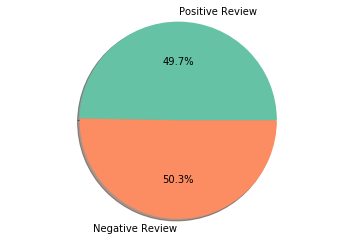

In [7]:
# show trainset's pos-neg ratio by pie chart
cnt_pos = cnt_neg = 0
for j in range(len(yelp_review_mix)):
    if yelp_review_mix['Sentiment'][j] == 'positive':
        cnt_pos += 1
    elif yelp_review_mix['Sentiment'][j] == 'negative':
        cnt_neg +=1 
sns.set_palette('Set2')
print('Mix Positive Reviews: ',cnt_pos)
print('Mix Negative Reviews: ',cnt_neg)
fig1, ax1 = plt.subplots()
ax1.pie([cnt_pos,cnt_neg], labels=['Positive Review','Negative Review'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [8]:
# seperate dataset to text(no_label) and label
x_train_full = yelp_review_mix['text']
y_train = yelp_review_mix['Sentiment']

## 1.4 import test set

In [9]:
# load downloded reviews from yelp
# yelp_review_test = pd.read_csv('yelp_review_test.csv',encoding = 'Latin-1', index_col=None)
# x_test_full = yelp_review_test['text']
# y_test = yelp_review_test['Sentiment']

In [10]:
# load scrapped reviews from yelp
yelp_review_test = pd.read_csv('yelp_scrap_review_q3.csv',encoding = 'Latin-1', index_col=None)
x_test_full = yelp_review_test['text']
y_test = yelp_review_test['Sentiment']

Test Positive Reviews:  160
Test Negative Reviews:  160


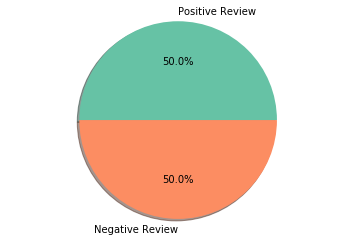

In [11]:
# show pos-neg ratio by pie chart
import seaborn as sns
import matplotlib.pyplot as plt
cnt_pos = cnt_neg = 0
for j in range(len(yelp_review_test)):
    if yelp_review_test['Sentiment'][j] == 'positive':
        cnt_pos += 1
    elif yelp_review_test['Sentiment'][j] == 'negative':
        cnt_neg +=1 
sns.set_palette('Set2')
print('Test Positive Reviews: ',cnt_pos)
print('Test Negative Reviews: ',cnt_neg)
fig1, ax1 = plt.subplots()
ax1.pie([cnt_pos,cnt_neg], labels=['Positive Review','Negative Review'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

# 2. Pre-process & Model Setup

In [12]:
# data pre-process setup
stop_words = set(stopwords.words('english')+ ['always'])
wordnet_lemmatizer = nltk.WordNetLemmatizer()

def pre_process(text):
    #keep only letters
    letters = re.sub('[^a-zA-Z]',' ',text)
    #tokenize
    tokens = nltk.word_tokenize(letters)
    lowercase = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lowercase))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    tokens_processed = " ".join(lemmas)
    return (tokens_processed)

In [13]:
# setup nb and svm model
clf_nb = Pipeline([('vect', CountVectorizer()),  
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                    ])
clf_svm = Pipeline([('vect', CountVectorizer()),  
                     ('tfidf', TfidfTransformer()),
                      ('clf', LinearSVC()),
                    ])

# 3. Models Building & Results (without negation)

## 3.1 pre-process train set & build models

In [14]:
# pre-process train set
x_train = x_train_full.apply(pre_process)

In [15]:
# build models with train set
clf_nb.fit(x_train,y_train)
clf_svm.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [16]:
predicted_nb = clf_nb.predict(x_train)
predicted_svm = clf_svm.predict(x_train)

## 3.2 pre-process test set & predict

In [17]:
x_test = x_test_full.apply(pre_process)

In [18]:
predicted_nb_test = clf_nb.predict(x_test)
predicted_svm_test = clf_svm.predict(x_test)

## 3.3 train set results

In [19]:
pred_nb = list(predicted_nb)
print('Naive Bayes Train Accuracy: ',metrics.accuracy_score(y_train, pred_nb))
print( metrics.classification_report(y_train,predicted_nb))
#nb confusion matrix
cm1=pd.crosstab( pd.Series(y_train), pd.Series(pred_nb), rownames= ['actuals'], colnames=['pred'],margins=True)
cm1

Naive Bayes Train Accuracy:  0.8897374485968639
             precision    recall  f1-score   support

   negative       0.89      0.89      0.89     11131
   positive       0.89      0.89      0.89     10998

avg / total       0.89      0.89      0.89     22129



pred      negative  positive    All
actuals                            
negative      9916      1215  11131
positive      1225      9773  10998
All          11141     10988  22129

In [20]:
pred_svm = list(predicted_svm)
print('SVM Train Accuracy: ',metrics.accuracy_score(y_train, pred_svm))
print(metrics.classification_report(y_train,predicted_svm))
#svm confusion matrix
cm2=pd.crosstab( pd.Series(y_train), pd.Series(pred_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
cm2

chart_non_neg_train_score = [metrics.accuracy_score(y_train, pred_nb),metrics.accuracy_score(y_train, pred_svm)]

SVM Train Accuracy:  0.9631705002485427
             precision    recall  f1-score   support

   negative       0.97      0.96      0.96     11131
   positive       0.96      0.97      0.96     10998

avg / total       0.96      0.96      0.96     22129



## 3.4 test set results

In [21]:
pred_nb_test = list(predicted_nb_test)
print('Naive Bayes Test Accuracy: ',metrics.accuracy_score(y_test, pred_nb_test))
print(metrics.classification_report(y_test,predicted_nb_test))
#nb confusion matrix
cm3=pd.crosstab( pd.Series(y_test), pd.Series(pred_nb_test), rownames= ['actuals'], colnames=['pred'],margins=True)
cm3

Naive Bayes Test Accuracy:  0.659375
             precision    recall  f1-score   support

   negative       0.63      0.78      0.69       160
   positive       0.71      0.54      0.61       160

avg / total       0.67      0.66      0.65       320



pred      negative  positive  All
actuals                          
negative       124        36  160
positive        73        87  160
All            197       123  320

In [22]:
pred_svm_test = list(predicted_svm_test)
print('SVM Test Accuracy: ',metrics.accuracy_score(y_test, pred_svm_test))
print(metrics.classification_report(y_test,predicted_svm_test))
#nb confusion matrix
cm4=pd.crosstab( pd.Series(y_test), pd.Series(pred_svm_test), rownames= ['actuals'], colnames=['pred'],margins=True)
cm4
chart_non_neg_test_score = [metrics.accuracy_score(y_test, pred_nb_test),metrics.accuracy_score(y_test, pred_svm_test)]

SVM Test Accuracy:  0.684375
             precision    recall  f1-score   support

   negative       0.66      0.77      0.71       160
   positive       0.72      0.60      0.66       160

avg / total       0.69      0.68      0.68       320



## 3.5 top 10 most informative words

['amazing', 'best', 'delicious', 'favorite', 'great', 'horrible', 'kimchi', 'korean', 'thai', 'worst']


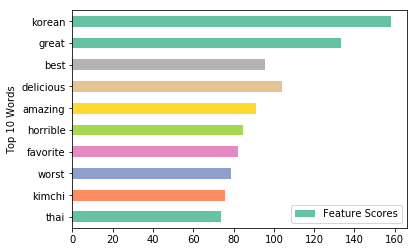

In [94]:
import numpy as np

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
x_train_best = SelectKBest(chi2, k=10)
x_train_best.fit_transform(train_vectors, y_train)
x_train_top_10 = list(np.array(vectorizer.get_feature_names())[x_train_best.get_support()])

print(x_train_top_10)

ind = np.argpartition(x_train_best.scores_,-10)[-10:]
top10_feature_scores = x_train_best.scores_[ind]
top10_feature_names = np.array(vectorizer.get_feature_names())[ind]


df_top_10 = pd.DataFrame({'Top 10 Words': top10_feature_names,
                         'Feature Scores': top10_feature_scores
                         })
df_top_10.plot.barh(x='Top 10 Words', y='Feature Scores')

# 4. Models Building & Results (applied negation)

## 4.1 pre-process train set & build models

In [24]:
def neg_tag(text):
    transformed = re.sub(r"\b(?:never|nothing|nowhere|noone|none|not|haven't|hasn't|hasnt|hadn't|hadnt|can't|cant|couldn't|couldnt|shouldn't|shouldnt|won't|wont|wouldn't|wouldnt|wasn't|don't|dont|doesn't|doesnt|didn't|didnt|isnt|isn't|aren't|arent|aint|ain't|hardly|seldom)\b[\w\s]+[^\w\s]",
                         lambda match: re.sub(r'(\s+)(\w+)', r'\1not\2', match.group(0)), text, flags=re.IGNORECASE)
    return(transformed)

In [25]:
x_train_neg = []
for doc in x_train_full:
    doc=doc.lower()
    trans=neg_tag(doc)
    x_train_neg.append([trans])

In [26]:
x_train_neg1=pd.DataFrame(x_train_neg)
x_train_neg2=x_train_neg1[0].apply(pre_process) 

In [27]:
clf_nb.fit(x_train_neg2,y_train)
clf_svm.fit(x_train_neg2,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [28]:
predicted_nb_train2 = clf_nb.predict(x_train_neg2)
predicted_svm_train2 = clf_svm.predict(x_train_neg2)

## 4.2 pre-process test set & predict

In [29]:
x_test_neg = []
for doc in x_test_full:
    doc=doc.lower()
    trans=neg_tag(doc)
    x_test_neg.append([trans])

In [30]:
x_test_neg1=pd.DataFrame(x_test_neg)
x_test_neg2=x_test_neg1[0].apply(pre_process)

In [31]:
predicted_nb_test2 = clf_nb.predict(x_test_neg2)
predicted_svm_test2 = clf_svm.predict(x_test_neg2)

## 4.3 train set results

In [32]:
pred_nb2 = list(predicted_nb_train2)
print('Naive Bayes Train Accuracy: ',metrics.accuracy_score(y_train, pred_nb2))
print( metrics.classification_report(y_train,predicted_nb_train2))
#nb confusion matrix
cm5=pd.crosstab( pd.Series(y_train), pd.Series(pred_nb2), rownames= ['actuals'], colnames=['pred'],margins=True)
cm5

Naive Bayes Train Accuracy:  0.8959284197207285
             precision    recall  f1-score   support

   negative       0.89      0.90      0.90     11131
   positive       0.90      0.89      0.89     10998

avg / total       0.90      0.90      0.90     22129



pred      negative  positive    All
actuals                            
negative     10045      1086  11131
positive      1217      9781  10998
All          11262     10867  22129

In [33]:
pred_svm2 = list(predicted_svm_train2)
print('SVM Train Accuracy: ',metrics.accuracy_score(y_train, pred_svm2))
print(metrics.classification_report(y_train,predicted_svm_train2))
#svm confusion matrix
cm6=pd.crosstab( pd.Series(y_train), pd.Series(pred_svm2), rownames= ['actuals'], colnames=['pred'],margins=True)
cm6

chart_neg_train_score = [metrics.accuracy_score(y_train, pred_nb2),metrics.accuracy_score(y_train, pred_svm2)]

SVM Train Accuracy:  0.9747390302318225
             precision    recall  f1-score   support

   negative       0.98      0.97      0.97     11131
   positive       0.97      0.98      0.97     10998

avg / total       0.97      0.97      0.97     22129



## 4.4 test set results

In [34]:
pred_nb_test2 = list(predicted_nb_test2)
print('Naive Bayes Test Accuracy: ',metrics.accuracy_score(y_test, pred_nb_test2))
print(metrics.classification_report(y_test,predicted_nb_test2))
#nb confusion matrix
cm7=pd.crosstab( pd.Series(y_test), pd.Series(pred_nb_test2), rownames= ['actuals'], colnames=['pred'],margins=True)
cm7

Naive Bayes Test Accuracy:  0.646875
             precision    recall  f1-score   support

   negative       0.62      0.76      0.68       160
   positive       0.69      0.54      0.60       160

avg / total       0.65      0.65      0.64       320



pred      negative  positive  All
actuals                          
negative       121        39  160
positive        74        86  160
All            195       125  320

In [35]:
pred_svm_test2 = list(predicted_svm_test2)
print('SVM Test Accuracy: ',metrics.accuracy_score(y_test, pred_svm_test2))
print(metrics.classification_report(y_test,predicted_svm_test2))
#nb confusion matrix
cm8=pd.crosstab( pd.Series(y_test), pd.Series(pred_svm_test2), rownames= ['actuals'], colnames=['pred'],margins=True)
cm8

chart_neg_test_score = [metrics.accuracy_score(y_test, pred_nb_test2),metrics.accuracy_score(y_test, pred_svm_test2)]

SVM Test Accuracy:  0.7
             precision    recall  f1-score   support

   negative       0.68      0.76      0.72       160
   positive       0.73      0.64      0.68       160

avg / total       0.70      0.70      0.70       320



## 4.5 top 10 most informative words

['amazing', 'bad', 'best', 'delicious', 'favorite', 'great', 'horrible', 'korean', 'love', 'notback']


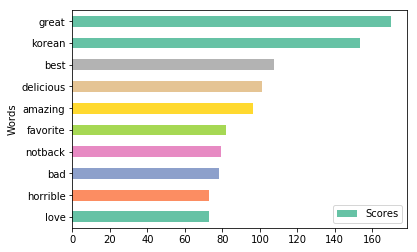

In [88]:
import numpy as np
import operator

vectorizer_neg = TfidfVectorizer()
train_vectors_neg = vectorizer_neg.fit_transform(x_train_neg2)
x_train_best_neg = SelectKBest(chi2, k=10)
x_train_best_neg.fit_transform(train_vectors_neg, y_train)

x_train_neg_top_10 = list(np.array(vectorizer_neg.get_feature_names())[x_train_best_neg.get_support()])
print(x_train_neg_top_10)

ind = np.argpartition(x_train_best_neg.scores_,-10)[-10:]
top10_feature_scores = x_train_best_neg.scores_[ind]
top10_feature_names = np.array(vectorizer_neg.get_feature_names())[ind]

set_top10 = {}
for i in range(len(top10_feature_scores)):
    set_top10[top10_feature_names[i]] = top10_feature_scores[i]
sorted_set_top10 = sorted(set_top10.items(), key=operator.itemgetter(1))

df_top_10 = pd.DataFrame({'Words': [w[0] for w in sorted_set_top10],
                         'Scores': [w[1] for w in sorted_set_top10]
                         })
df_top_10.plot.barh(x='Words', y='Scores')


# 5 Generate Files 

## 5.1 Sentiment Scores  

In [37]:
def scoredfile(indf, pred_nb, pred_svm, train_test):
    temp = indf
    temp['predicted_nb'] = pred_nb
    temp['predicted_svm'] = pred_svm
    temp.to_csv(train_test + '_scored.csv')
    return temp

In [38]:
# train_scored
scoredfile(yelp_review_mix, predicted_nb_train2, predicted_svm_train2, 'train')

# test_scored
scoredfile = scoredfile(yelp_review_test, predicted_nb_test2, predicted_svm_test2, 'test')
scoredfile.head()

name Sentiment category  \
0  Pearl's Deluxe Burgers  positive  Burgers   
1  Pearl's Deluxe Burgers  positive  Burgers   
2  Pearl's Deluxe Burgers  positive  Burgers   
3  Pearl's Deluxe Burgers  positive  Burgers   
4  Pearl's Deluxe Burgers  positive  Burgers   

                                                text             business_id  \
0  I found hamburger heaven in San Francisco. Ham...  TRBP1G1l8vZkjgfqdx96Cw   
1  My quest to find SF's best burger continues. M...  TRBP1G1l8vZkjgfqdx96Cw   
2  I told myself, never make a review without act...  TRBP1G1l8vZkjgfqdx96Cw   
3  Excellent burgers and possibly the best fast f...  TRBP1G1l8vZkjgfqdx96Cw   
4  After 10 years in the city I've FINALLLLLLLY m...  TRBP1G1l8vZkjgfqdx96Cw   

  predicted_nb predicted_svm  
0     negative      positive  
1     negative      positive  
2     positive      positive  
3     positive      positive  
4     positive      positive

## 5.2 JSON File

In [39]:
json_dict = OrderedDict({})
for cat,cat_data in scoredfile.groupby('category'):
    business = []
    for biz, biz_data in cat_data.groupby('business_id'):
        indiv = OrderedDict({})
        reviews = []
        for index, row in biz_data.iterrows():
            review = OrderedDict({})
            review['text'] = row.text
            review['score'] = row.predicted_svm
            reviews.append(review)
        no_reviews = len(reviews)
        indiv['name'] = biz_data.name.tolist()[0]
        indiv['business_id'] = biz_data.business_id.tolist()[0]
        indiv['nb_reviews'] = no_reviews
        indiv['reviews'] = reviews
        business.append(OrderedDict(indiv))
    json_dict[cat]=business

with open('review.json', 'w') as fp:
    json.dump(json_dict, fp)

In [ ]:
## 5.3 Conclusion

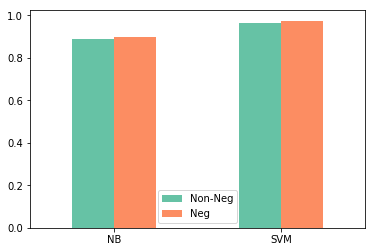

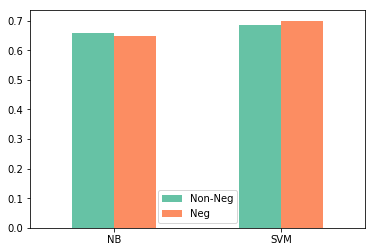

In [92]:
# non-neg and neg train score char
df_train_score = pd.DataFrame({'Non-Neg':chart_non_neg_train_score,
                               'Neg':chart_neg_train_score},
                             index=['NB','SVM']) 

df_train_score.plot.bar(rot=0)


# non-neg and neg test score chart
df_test_score = pd.DataFrame({'Non-Neg':chart_non_neg_test_score,
                               'Neg':chart_neg_test_score},
                             index=['NB','SVM']) 
df_test_score.plot.bar(rot=0)